In [0]:
#importing the required libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
#loading the dataset.
wine = pd.read_csv('wine_quality-red.csv',sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#this tells the number of null values in each column data.
#very great
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
#Preprocessing data for analysis
#here the 2 is for 2 bins and spreading over 6.5 and 8
bins = (2,6.5,8) # so we have to pass bins as the tuple of values.

group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins = bins,labels=group_names)


In [7]:
wine['quality'].unique

<bound method Series.unique of 0        bad
1        bad
2        bad
3        bad
4        bad
5        bad
6        bad
7       good
8       good
9        bad
10       bad
11       bad
12       bad
13       bad
14       bad
15       bad
16      good
17       bad
18       bad
19       bad
20       bad
21       bad
22       bad
23       bad
24       bad
25       bad
26       bad
27       bad
28       bad
29       bad
        ... 
1569     bad
1570     bad
1571     bad
1572     bad
1573     bad
1574     bad
1575     bad
1576     bad
1577     bad
1578     bad
1579     bad
1580     bad
1581     bad
1582     bad
1583     bad
1584    good
1585     bad
1586     bad
1587     bad
1588     bad
1589     bad
1590     bad
1591     bad
1592     bad
1593     bad
1594     bad
1595     bad
1596     bad
1597     bad
1598     bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]>

In [0]:
label_quality = LabelEncoder()

In [0]:
wine['quality'] =label_quality.fit_transform(wine['quality'])

In [10]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [11]:
#this tells about the higher quality things as defined by us
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

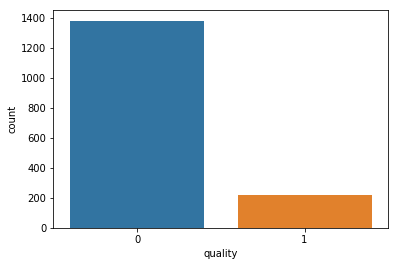

In [12]:
sns.countplot(wine['quality'])

In [0]:
#now seperate the dataset as response variable and feature variables
X = wine.drop('quality',axis=1)
y = wine['quality']

In [0]:
#Train and test splitting data
#as shown below this is one method to spllit the data for training and testing
#test size is 20% here for testing
#random state is to start point randomly.
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [0]:
#Applying the standard scaling to get optimized result.
#to scale the values to do analysis easily.

#when applied to train data, same should be applied to test data as well
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

**Random Forest Classifier**

In [0]:
#random forest classifier has least amount of the params.
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
predict_rfc = rfc.predict(X_test)

In [18]:
predict_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [23]:
#lets see how our model is performing
print(classification_report(y_test,predict_rfc))
print(confusion_matrix(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.76      0.55      0.64        47

    accuracy                           0.91       320
   macro avg       0.85      0.76      0.80       320
weighted avg       0.90      0.91      0.90       320

[[265   8]
 [ 21  26]]


SVM Classifier

In [0]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [22]:
#lets see how our model is performing
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


**Neural Network**

In [24]:
#in this context NN is not relevant
#just to have glance here we are exploring NN in Sklearn
mlpc =  MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter = 500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
#lets see how our model is performing
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       273
           1       0.47      0.36      0.41        47

    accuracy                           0.85       320
   macro avg       0.68      0.65      0.66       320
weighted avg       0.83      0.85      0.84       320

[[254  19]
 [ 30  17]]


In [27]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,predict_rfc )
cm

0.909375

In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [0]:
#utilizing the model predcitions for other data.

Xnew = #some data
Xnew = sc.transform(Xnew)
yNew = rfc.predict(Xnew)
ynew